<a href="https://colab.research.google.com/github/mukulre/Data-Science-Projects/blob/main/E0322052_Denoising_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TensorFlow/Keras for the Autoencoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('heart.csv')

# Separate features (X) and the final target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("Dataset loaded successfully.")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Dataset loaded successfully.
Shape of features (X): (918, 11)
Shape of target (y): (918,)


In [5]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any
)

# Fit and transform the entire dataset to create a processed version
X_processed = preprocessor.fit_transform(X)

print("\nData preprocessing complete.")
print("Shape of processed data:", X_processed.shape)


Data preprocessing complete.
Shape of processed data: (918, 20)


In [6]:
# Add random Gaussian noise to the processed data
noise_factor = 0.5
X_processed_noisy = X_processed + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_processed.shape)

# Split the data for the autoencoder and the final classifier
# We'll train the autoencoder on the full dataset to learn the best representation
# Then we'll split the clean data to train and test the classifier
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
X_train_noisy, X_test_noisy, _, _ = train_test_split(X_processed_noisy, y, test_size=0.2, random_state=42, stratify=y)


print("\nNoisy data created.")
print("Shape of training data (clean):", X_train.shape)
print("Shape of training data (noisy):", X_train_noisy.shape)


Noisy data created.
Shape of training data (clean): (734, 20)
Shape of training data (noisy): (734, 20)


Model: "Denoising_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Output (Dense)          │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_Output (Dense)          │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,388 (28.86 KB)

 Trainable params: 7,388 (28.86 KB)

 Non-trainable params: 0 (0.00 B)


Training the Denoising Autoencoder...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5236 - val_loss: 0.4848
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4556 - val_loss: 0.4293
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4013 - val_loss: 0.3978
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3710 - val_loss: 0.3714
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3430 - val_loss: 0.3535
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3224 - val_loss: 0.3442
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3165 - val_loss: 0.3381
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3043 - val_loss: 0.3342
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2970 - val_loss: 0.3324
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3036 - val_loss: 0.3312
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2913 - val_loss: 0.3295
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━

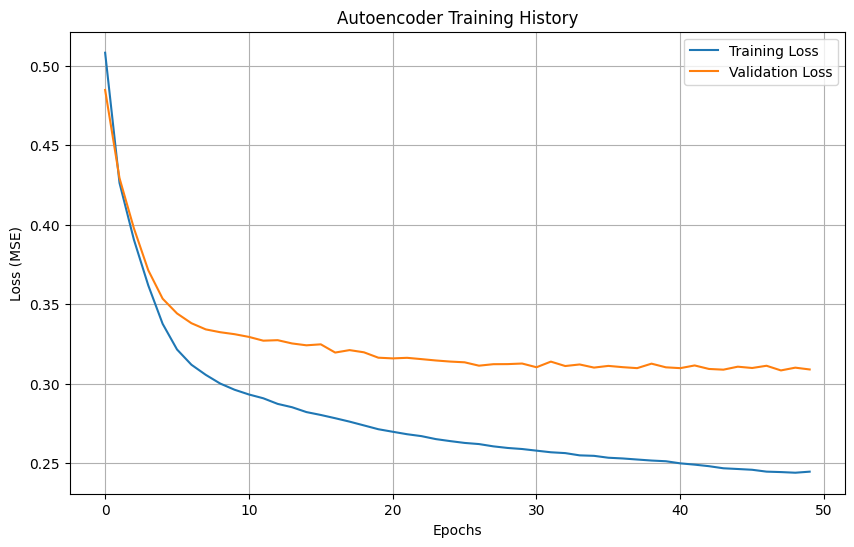

In [7]:
# Define the dimensions
input_dim = X_processed.shape[1]
encoding_dim = 8  # The size of the compressed representation

# --- Encoder ---
input_layer = Input(shape=(input_dim,), name="Input")
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu', name="Encoder_Output")(encoder)

# --- Decoder ---
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid', name="Decoder_Output")(decoder) # Use sigmoid for output between 0-1

# --- Denoising Autoencoder Model ---
# We train it to map noisy input to the original clean input
autoencoder = Model(inputs=input_layer, outputs=decoder, name="Denoising_Autoencoder")

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
autoencoder.summary()

# Train the autoencoder
print("\nTraining the Denoising Autoencoder...")
history = autoencoder.fit(
    X_train_noisy, X_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_noisy, X_test),
    shuffle=True,
    verbose=1
)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Create a new model which is just the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder, name="Encoder")

# Use the trained encoder to transform our clean data into compressed features
X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

print("\nData transformed using the trained encoder.")
print("Shape of encoded training data:", X_train_encoded.shape)

# --- Build the Classifier ---
# We'll build a simple neural network classifier that takes the encoded features as input
classifier_input = Input(shape=(encoding_dim,), name="Classifier_Input")
classifier_layer = Dense(16, activation='relu')(classifier_input)
classifier_layer = Dense(8, activation='relu')(classifier_layer)
classifier_output = Dense(1, activation='sigmoid', name="Classifier_Output")(classifier_layer) # Sigmoid for binary classification

classifier = Model(inputs=classifier_input, outputs=classifier_output, name="Heart_Disease_Classifier")

# Compile the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier on the encoded features
print("\nTraining the classifier on encoded features...")
classifier.fit(
    X_train_encoded, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_encoded, y_test),
    verbose=1
)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Data transformed using the trained encoder.
Shape of encoded training data: (734, 8)

Training the classifier on encoded features...
Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4801 - loss: 1.2696 - val_accuracy: 0.5217 - val_loss: 0.8489
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 0.8177 - val_accuracy: 0.6250 - val_loss: 0.6742
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6224 - loss: 0.6513 - val_accuracy: 0.7500 - val_loss: 0.5672
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.5492 - val_accuracy: 0.8207 - val_loss: 0.5020
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8059 - loss: 0.4960 - val_accuracy: 0.8370 - val_loss: 0.4614
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.4541 - val_accuracy: 0.8641 - val_loss: 0.4332
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Final Classifier Accuracy on Encoded Data: 0.8859

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix:


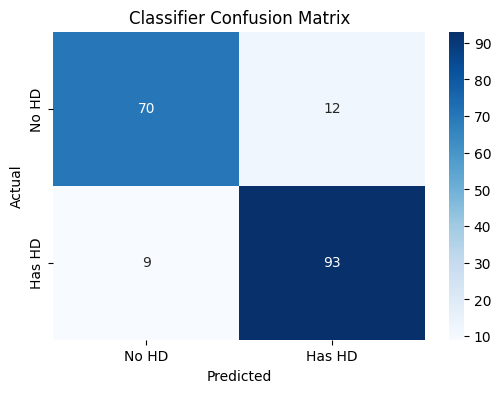

In [9]:
# Make predictions
y_pred_proba = classifier.predict(X_test_encoded)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Classifier Accuracy on Encoded Data: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'Has HD'], yticklabels=['No HD', 'Has HD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Classifier Confusion Matrix')
plt.show()